# ASSIGNMENT 12: RANDOM FOREST

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_excel('glass.xlsx',sheet_name='glass')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Task 01: Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Task 02: Data Visualization

* <b>Boxplot</b>

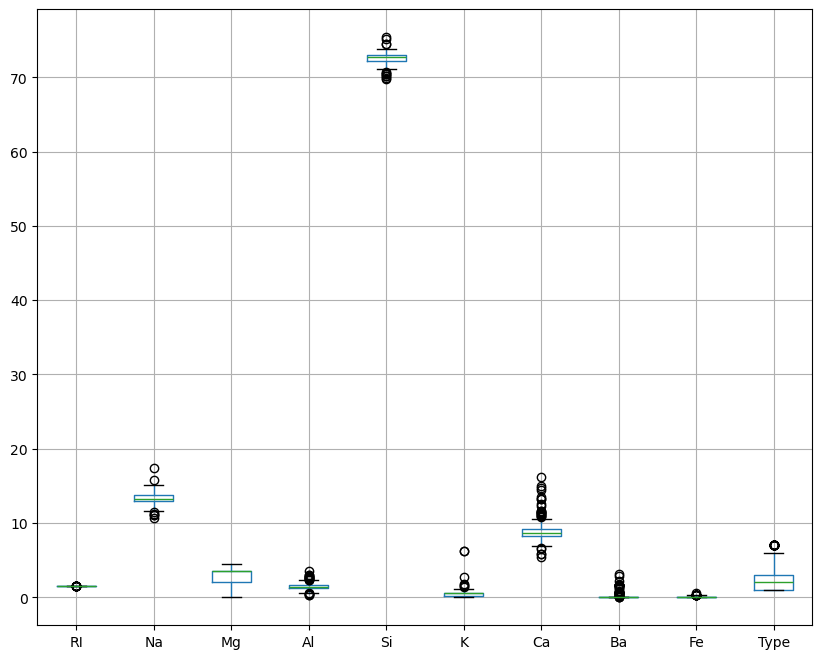

In [7]:
data.boxplot(figsize=(10,8))
plt.show()

* <b> Histogram </b>

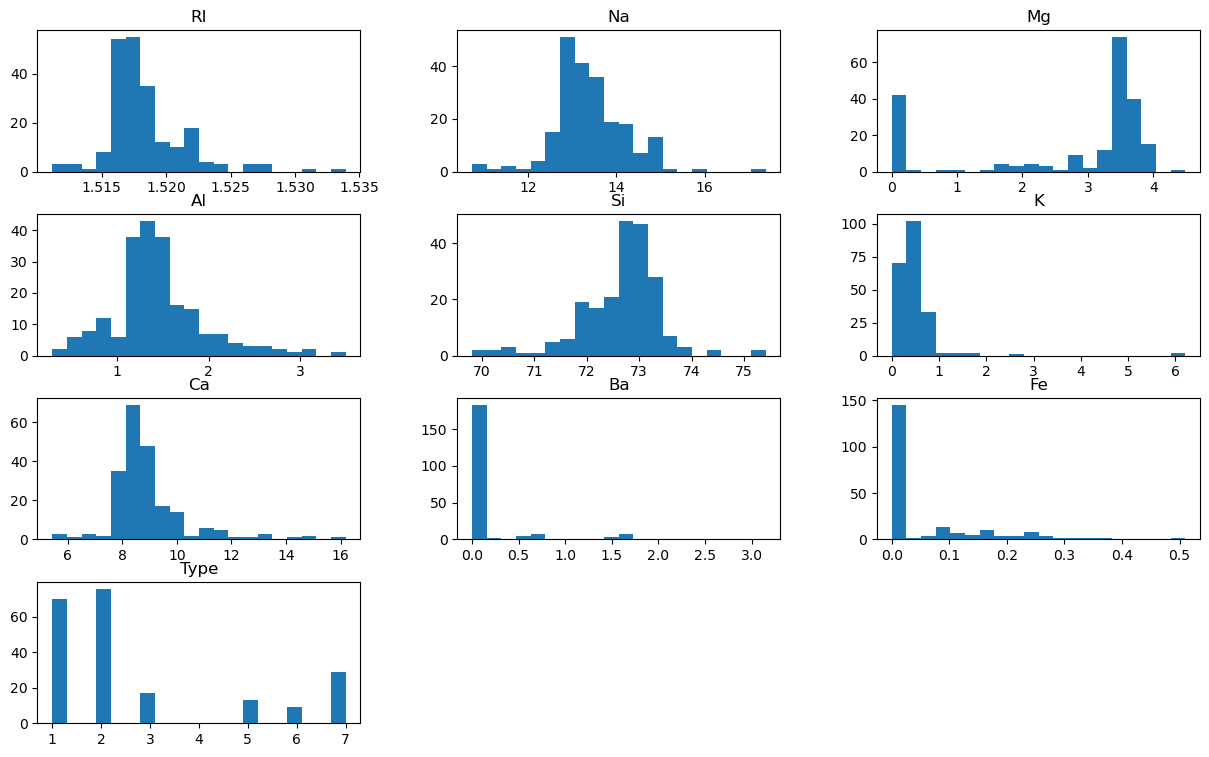

In [10]:
data.hist(bins=20,figsize=(15,9),grid=False)
plt.show()

* <b> Correlation </b>

In [11]:
correlation_matrix = data.corr()
correlation_matrix

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


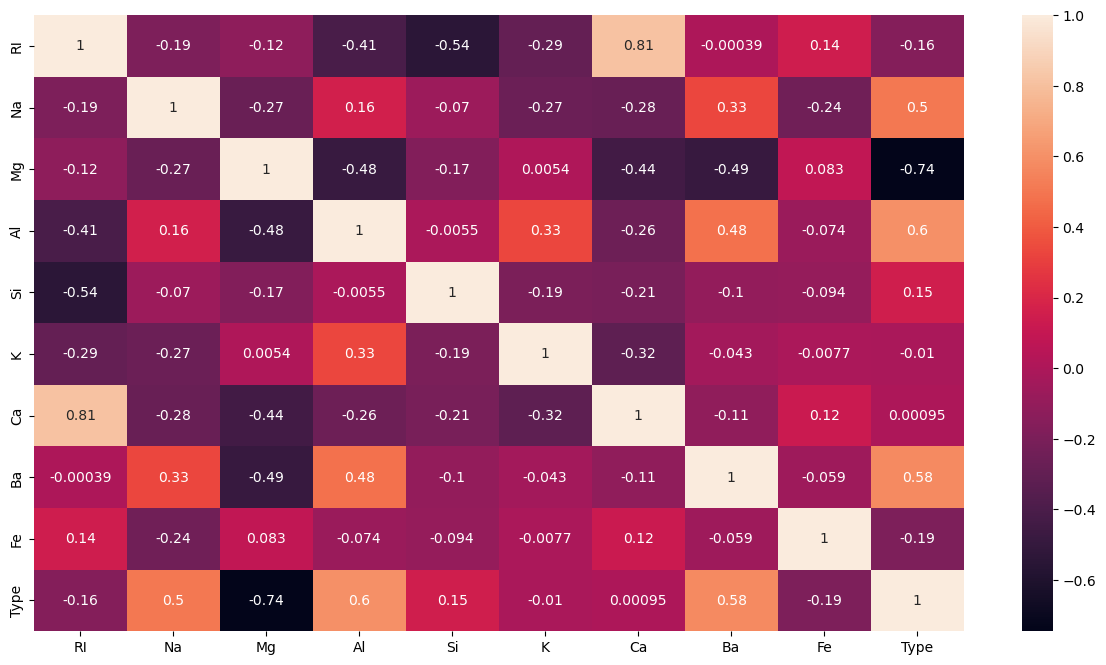

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

# Task 03: Data Preprocessing

In [14]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<b> There are no Categorical Variables

# Task 04: Random Forest Model Implementation

In [16]:
features = data.drop('Type', axis=1)
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [17]:
target = data['Type']

In [ ]:
# Splitting data into train=70% and test=30%
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [20]:
model = RandomForestClassifier(n_estimators=50, max_features=3)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=50)

In [22]:
y_pred = model.predict(X_test)
print('Classification Report:',classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           1       0.72      0.95      0.82        19
           2       0.81      0.74      0.77        23
           3       1.00      0.50      0.67         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.82        65
   macro avg       0.88      0.78      0.80        65
weighted avg       0.84      0.82      0.81        65



# Task 05: Bagging and Boosting Methods

* <b> Bagging </b>

In [24]:
tree_model = DecisionTreeClassifier()

In [ ]:
# Bagging Method using Decision Tree Classifier
model2 = BaggingClassifier(tree_model, n_estimators=40)
model2.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=40)

In [26]:
y_preds = model2.predict(X_test)
print("Classification Report:",classification_report(y_test,y_preds))

Classification Report:               precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.78      0.61      0.68        23
           3       0.67      0.50      0.57         4
           5       0.83      0.83      0.83         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.77      0.80      0.78        65
weighted avg       0.77      0.77      0.76        65



* <b> Boosting </b>

In [28]:
base_estimator = DecisionTreeClassifier()

In [ ]:
# Applying Adaboost Classifier
model3 = AdaBoostClassifier(base_estimator, n_estimators=40)
model3.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=40)

In [30]:
y_pred = model3.predict(X_test)
print("Classification Report:",classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           1       0.67      0.74      0.70        19
           2       0.78      0.61      0.68        23
           3       0.33      0.50      0.40         4
           5       0.75      0.50      0.60         6
           6       0.50      1.00      0.67         3
           7       0.90      0.90      0.90        10

    accuracy                           0.69        65
   macro avg       0.65      0.71      0.66        65
weighted avg       0.72      0.69      0.70        65



# Additional Notes:

Bagging: It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average.

Boosting: It is also a homogeneous weak learners’ model but works differently from Bagging. In this model, learners learn sequentially and adaptively to improve model predictions of a learning algorithm.

we can handle imbalance data by performing oversmapling or undersamplig technique to balance the data and go for f1score,preciison,recall to check the performance as there is no mistake in the model for the results